참고 https://cleancode-ws.tistory.com/109

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import FinanceDataReader as fdr

import datetime as dt

import numpy as np

from tqdm import tqdm #진행바
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

# GPU
import tensorflow as tf

#https://www.tensorflow.org/guide/gpu#allowing_gpu_memory_growth
#프로세스의 요구량만큼 메모리 사용 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for i in range(len(gpus)):
            tf.config.experimental.set_memory_growth(gpus[i], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)
        
#지정해서 쓰고 싶으면 model 쓸 때는 with 구문 안에 넣기

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [5]:
# 데이터 로딩
load_data = load_boston()
print('########## type(load_data)',type(load_data))
print('########## load_data.keys()', load_data.keys())
print('########## load_data.DESCR', load_data.DESCR)

########## type(load_data) <class 'sklearn.utils.Bunch'>
########## load_data.keys() dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
########## load_data.DESCR .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

In [6]:
# np에서 pd로 변환하기
data = load_data['data']
df_X = pd.DataFrame(columns = load_data['feature_names'],
                   data = load_data['data'])
print(df_X.info())
print(load_data['target'])

df_y = pd.DataFrame({'target':load_data['target']})
df = pd.concat([df_X, df_y], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9

In [7]:
# 데이터 확인
print(df.info()) # 데이터 구조 확인
print(df.describe()) # 데이터 통계

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

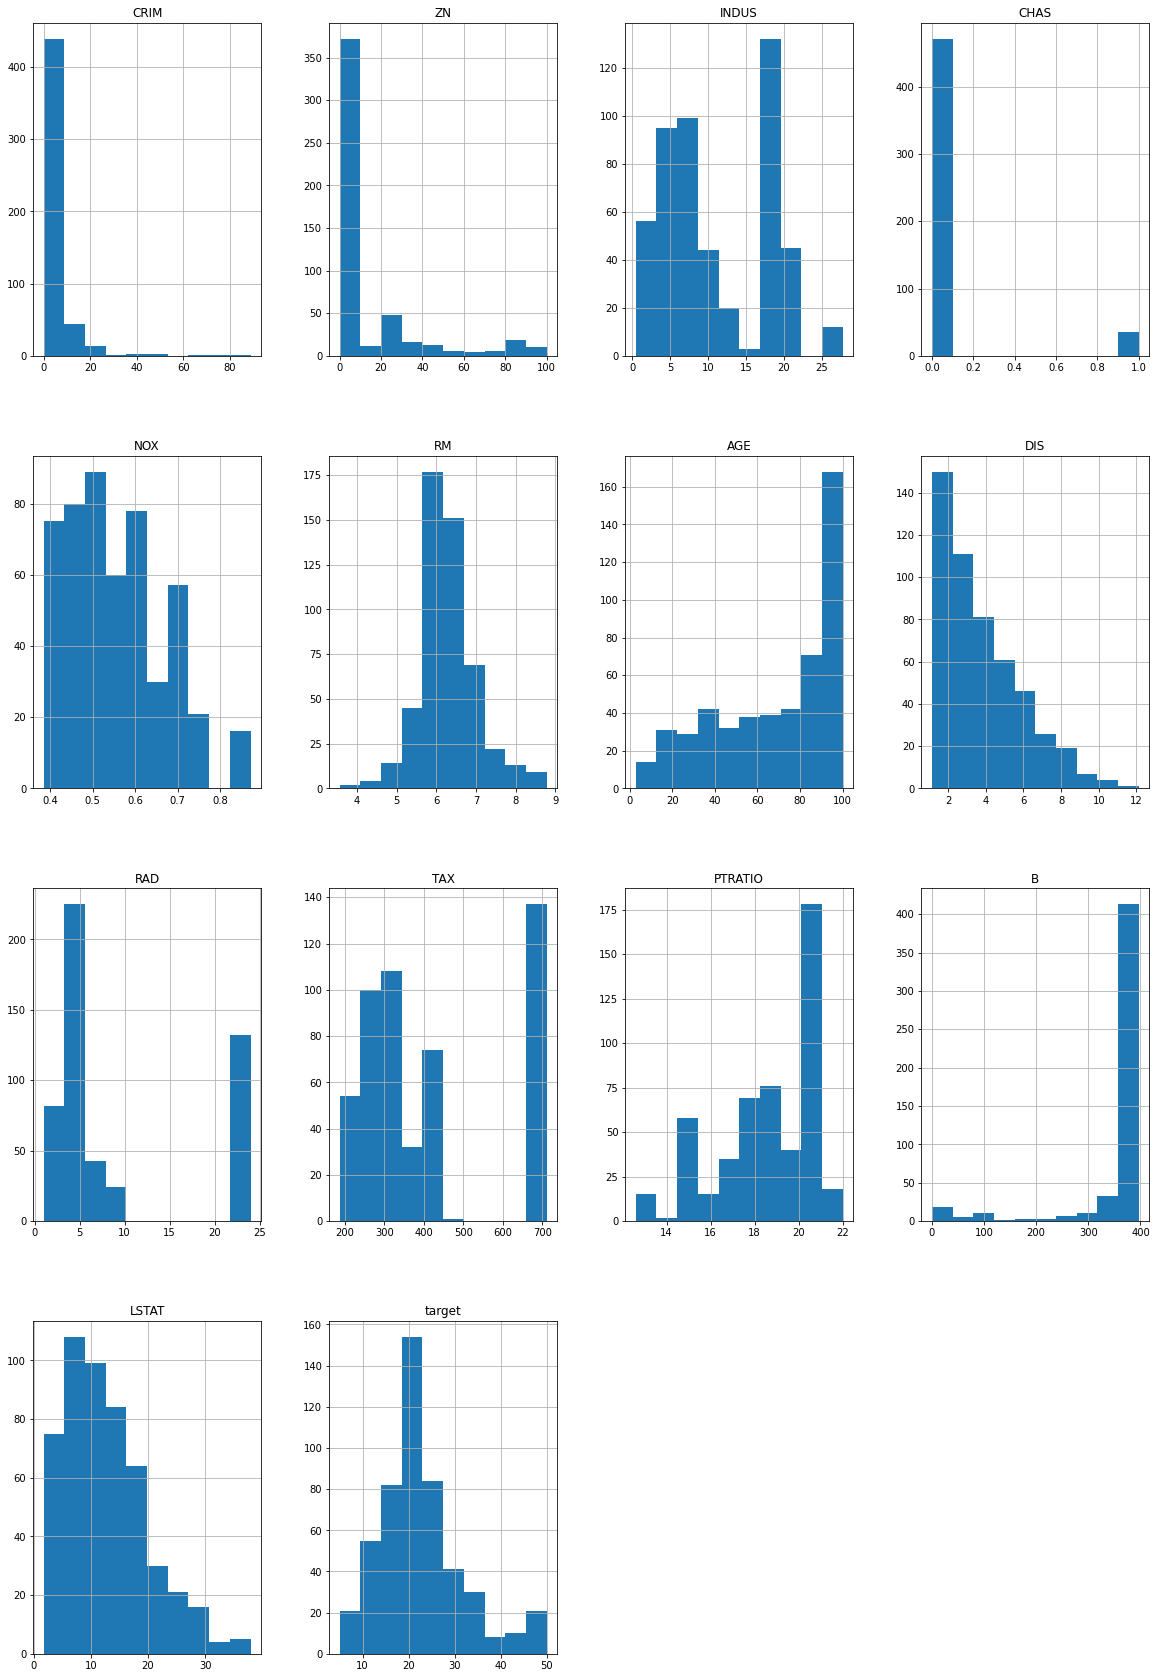

In [8]:
# 데이터 분포 확인 시각화
_ = df.hist(figsize = (20,30))

      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
3  0.03237  0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905  0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  target  index_check  
3  394.63   2.94    33.4            3  
4  396.90   5.33    36.2            4  


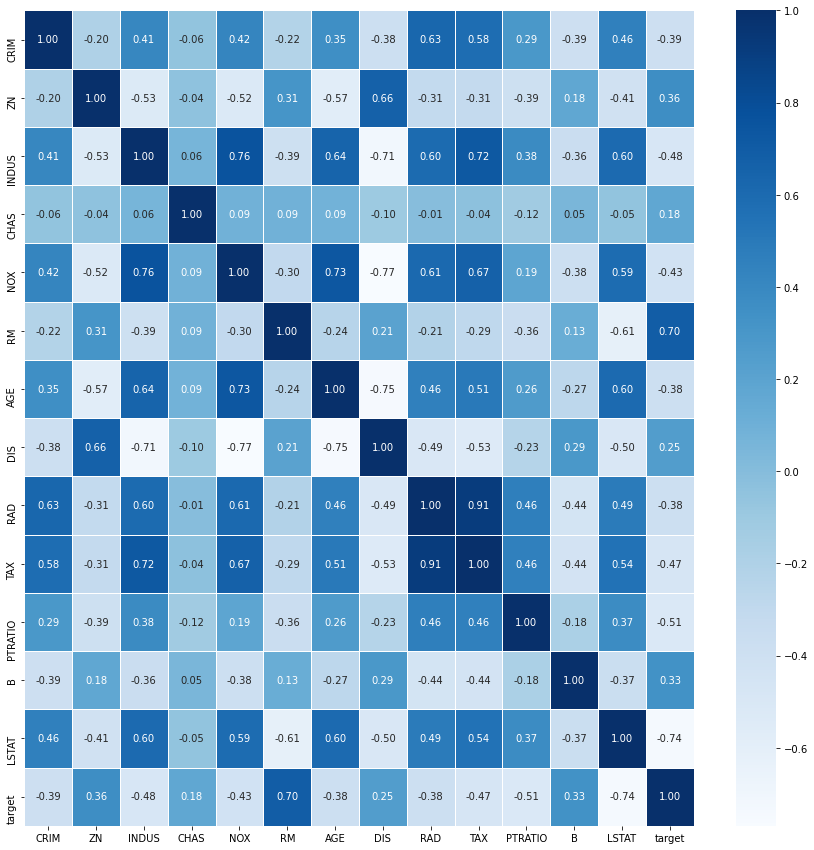

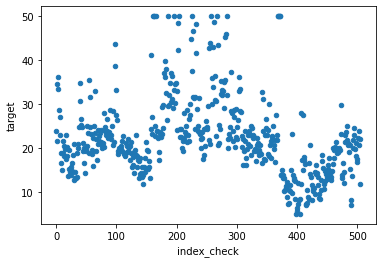

In [9]:
# 상관관계 분석 및 시각화
_ = plt.figure(figsize = (15,15))
_ = sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

df['index_check'] = [i for i in range(len(df))]
_ = df.plot.scatter(x = 'index_check', y = 'target')
print(df.iloc[3:5])

In [11]:
# train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 2012) # default option ~ shuffle = True, shuffle; random


# 전처리 파이프라인 만들기
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer
# 에러메세지: ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/__init__.py)
# 해결책: https://log-laboratory.tistory.com/328
# 공식 문서: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

my_pipeline = Pipeline([('mean_imputer', SimpleImputer(strategy = 'mean')),
                       ('mm_scaler', MinMaxScaler())])

# 모델 학습
X_train_fit = my_pipeline.fit(X_train)
X_train_pre = X_train_fit.transform(X_train)
X_test_pre = X_train_fit.transform(X_test)
print(pd.DataFrame(X_train_pre).describe()) # 전처리 상황 확인

y_train_fit = my_pipeline.fit(y_train)
y_train_pre = y_train_fit.transform(y_train)
y_test_pre = y_train_fit.transform(y_test)

               0           1           2           3           4           5   \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean     0.044934    0.107218    0.396790    0.064972    0.349999    0.557885   
std      0.108941    0.223026    0.246314    0.246825    0.247795    0.136107   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000859    0.000000    0.178152    0.000000    0.121086    0.480566   
50%      0.002919    0.000000    0.346041    0.000000    0.304802    0.542485   
75%      0.045287    0.125000    0.646628    0.000000    0.532359    0.630970   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean     0.687651    0.235082    0.381233    0.428796    0.624144    0.895698   
std      0.288987    0.1874

In [14]:
# 회귀 모델 만들기
def my_regressor(df_X, df_y):
    from sklearn.linear_model import LinearRegression # 일반 회귀 모델
    from sklearn.linear_model import Ridge, Lasso, ElasticNet # Norm 규제 회귀 모델
    from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
    from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
    from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅
    from sklearn.model_selection import cross_val_score # model 검증
    
    import ast # convert string to function
    import numpy as np
    
    linear = LinearRegression()
    ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
    ardr_linear, baysian_ridge = ARDRegression(), BayesianRidge()
    random_forest = RandomForestRegressor()
    xgboost_linear = XGBRegressor()
    
    my_model_list = ['linear', 'ridge', 'lasso', 'elasticnet',
                     'ardr_linear', 'baysian_ridge',
                     'random_forest', 'xgboost_linear']
    
    score_dic = dict()
    for model_nm in my_model_list:
        scores = cross_val_score(eval(model_nm), df_X, df_y, scoring = 'neg_mean_squared_error') # cv default = 5
        rmse_score = np.sqrt(-scores)
        rmse_sm = rmse_score.mean()
        score_dic[model_nm] = rmse_sm
    
    score_dic = sorted(score_dic.items(), key = lambda t : t[1]) # 정확도 순으로 줄세워짐.
    
    return score_dic#[0]

In [15]:
linear_model_train_score = my_regressor(X_train_pre, y_train_pre)
print(linear_model_train_score)

[('xgboost_linear', 0.07813297780601951), ('random_forest', 0.07950868131685646), ('baysian_ridge', 0.10877816432360683), ('ridge', 0.10895997595404423), ('linear', 0.10908296107253716), ('ardr_linear', 0.10933117528401122), ('lasso', 0.20022547538342472), ('elasticnet', 0.20022547538342472)]
